In [4]:
import os

import getpass
from pathlib import Path, PureWindowsPath # please check this medium article!! https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f



if getpass.getuser() == 'Konrad':
    project_dir = Path(PureWindowsPath('D:\\DeepLearningProject'))
elif getpass.getuser() == 'fruechtnicht':
    project_dir = Path('/Users/fruechtnicht/NOVA/M.Sc_Data_Science_and_Advanced_Analytics/Semester2/Deep_Learning/Project/project_dir')
else:
    raise ValueError('Check you own user name and add proper elif statement !!!')
# if you have a windows computer please specify your project path as Konrad, if not as fruechtnicht
os.chdir(project_dir/'log')

In [48]:
import pandas as pd 
import glob
import re
final = pd.DataFrame()
for file in glob.glob("*testing_ethnic_nr_of_channel_*"):
    seed = re.search("\d(?=(_training\.csv))", file).group(0)  
    value = re.search("\d*(?=(_\d*_training\.csv))", file).group(0)  
    variable = re.search("(?<=ethnic_).*(?=(_\d*_\d*_training\.csv))", file).group(0)  
    df = pd.read_csv(file)
    df[variable]= int(value)
    df['seed']= int(seed)
    final = pd.concat([final,df], axis=0)
    


16
16
64
128
64
128
64
128
16


In [51]:
final.groupby(['epoch', 'nr_of_channel']).mean()

acc      loss   val_acc  val_loss  seed
epoch nr_of_channel                                              
0     16             0.390208  1.510987  0.422181  1.447798   1.0
      64             0.396878  1.517043  0.414828  1.453115   1.0
      128            0.390208  1.519953  0.402574  1.464090   1.0
1     16             0.436250  1.454734  0.422794  1.436882   1.0
      64             0.425833  1.469609  0.409314  1.455490   1.0
      128            0.410208  1.475303  0.435662  1.413511   1.0
2     16             0.437083  1.434757  0.411765  1.438578   1.0
      64             0.416875  1.455796  0.436275  1.401265   1.0
      128            0.433750  1.440901  0.441789  1.460229   1.0
3     16             0.433456  1.419581  0.453431  1.386712   1.0
      64             0.441458  1.419637  0.474877  1.394456   1.0
      128            0.453958  1.411050  0.473652  1.362694   1.0
4     16             0.457083  1.382466  0.482843  1.318986   1.0
      64             0.460328  1.403323  0.485907  1.330813   1.0
      128            0.477708  1.380966  0.466912  1.369767   1.0
5     16             0.467500  1.367141  0.495098  1.308138   1.0
      64             0.471042  1.380064  0.482230  1.324918   1.0
      128            0.469910  1.386765  0.477328  1.317283   1.0
6     16             0.492708  1.335685  0.496324  1.272433   1.0
      64             0.489583  1.328333  0.493260  1.279903   1.0
      128            0.479792  1.355154  0.513480  1.302589   1.0
7     16             0.509583  1.293526  0.496324  1.257999   1.0
      64             0.483491  1.329550  0.500613  1.274212   1.0
      128            0.485000  1.343442  0.495098  1.294849   1.0
8     16             0.503776  1.288005  0.513733  1.216124   1.0
      64             0.507500  1.296292  0.555556  1.182977   1.0
      128            0.504583  1.305487  0.483770  1.260503   1.0
9     16             0.513750  1.245859  0.506127  1.226613   1.0
      64             0.509167  1.295169  0.520833  1.233309   1.0
      128            0.493759  1.299028  0.564951  1.158322   1.0
10    16             0.528958  1.223462  0.544730  1.151537   1.0
      64             0.514167  1.264924  0.526961  1.209117   1.0
      128            0.530221  1.238931  0.549020  1.137116   1.0
11    16             0.541042  1.200604  0.564951  1.105763   1.0
      64             0.520833  1.226640  0.560049  1.140895   1.0
      128            0.528542  1.210350  0.566789  1.119905   1.0
12    16             0.556340  1.167989  0.610294  1.035751   1.0
      64             0.536875  1.208909  0.587623  1.090388   1.0
      128            0.544167  1.203098  0.591912  1.082926   1.0
13    16             0.555833  1.162647  0.601103  1.045586   1.0
      64             0.542500  1.189078  0.570772  1.120305   0.5
      128            0.552585  1.177413  0.607230  1.052881   1.0
14    16             0.591837  1.121078  0.625613  1.008005   1.0
      64             0.535937  1.214058  0.568934  1.109298   0.5
      128            0.572917  1.143429  0.633578  0.994787   1.0
15    16             0.578578  1.113299  0.639093  0.994505   1.0
      64             0.545313  1.193026  0.590074  1.066878   0.5
      128            0.585625  1.123303  0.643995  0.968742   1.0
16    16             0.597083  1.092252  0.652574  0.958640   1.0
      64             0.540937  1.185261  0.581801  1.081190   0.5
      128            0.586667  1.112682  0.637868  0.989489   1.0
17    16             0.602292  1.081664  0.660424  0.965362   1.0
      64             0.554688  1.161068  0.592697  1.061688   0.5
      128            0.590208  1.102117  0.677278  0.932906   1.0
18    16             0.606250  1.078365  0.676471  0.906255   1.0
      64             0.566437  1.114050  0.628676  0.979161   0.5
      128            0.600833  1.086287  0.656863  0.936242   1.0
19    16             0.608125  1.074818  0.669118  0.934951   1.0
      64             0.571875  1.123537  0.635110  0.997765   0.5


In [ ]:
print(list(df.columns[:-1].values))
    group = df.groupby(['epoch', 'acc', 'loss', 'val_acc', 'val_loss', 'nr_of_channel']).mean()
    print(group.columns.values)

In [55]:
final['nr_of_channel'].unique()

array([ 16,  64, 128])

In [71]:
final['nr_of_channel'] = final['nr_of_channel'].astype('int')

In [72]:
final.head()

,epoch,acc,loss,val_acc,val_loss,nr_of_channel,seed
0,0,0.403750,1.500921,0.408088,1.450387,16,0
1,1,0.443750,1.445211,0.435662,1.432464,16,0
2,2,0.440000,1.430873,0.433824,1.424456,16,0
3,3,0.428931,1.414497,0.477941,1.365048,16,0
4,4,0.481875,1.358085,0.477941,1.303885,16,0


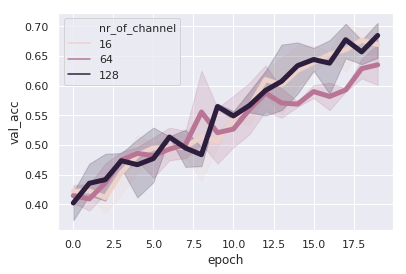

In [74]:
sns.lineplot(x="epoch", y="val_acc", data=final, hue="nr_of_channel", linewidth=5.0,legend="full")




In [52]:

#final["Algorithem"] = final["2"]  + final["6"].map(str) + final["7"] + final["8"] + final["9"].map(str) + final["10"] + final["11"].map(str) + final["11"].map(str) + final["12"].map(str) + final["13"].map(str)



import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(24,16)})
ax = sns.lineplot(x="epoch", y="val_acc", data=final, hue="nr_of_channel", linewidth=5.0)
ax.set_title('Performance of Selection algorithems', fontsize=25)
ax.legend(frameon=False, loc='lower center',ncol=2, fontsize=20)
ax.set_xlabel("number of generations",fontsize=20)
ax.set_ylabel("unseen accuracy",fontsize=20)
ax.tick_params(labelsize=18)
ax.legend(loc='best',fontsize='xx-large')
fig = ax.get_figure()




/Users/fruechtnicht/NOVA/M.Sc_Data_Science_and_Advanced_Analytics/Semester2/Deep_Learning/Project/project_dir/venv/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


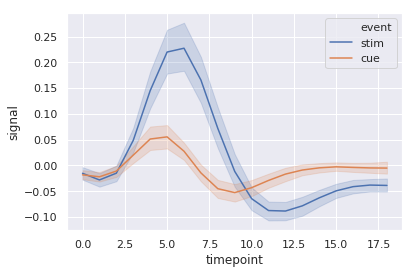

In [65]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
fmri = sns.load_dataset("fmri")
ax = sns.lineplot(x="timepoint", y="signal", data=fmri, hue='event')

In [66]:
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
5,s9,18,stim,parietal,-0.103513
6,s8,18,stim,parietal,-0.064408
7,s7,18,stim,parietal,-0.060526
8,s6,18,stim,parietal,-0.007029
9,s5,18,stim,parietal,-0.040557
